In [1]:
import pandas as pd

corona = pd.read_csv('data.csv') 
print("\nDataFrame Info:")
corona.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 no

In [14]:
corona.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [2]:
# Identify relevant columns
relevant_columns = ['countriesAndTerritories', 'cases', 'deaths','day', 'month', 'year']
print("\nRelevant Columns:", relevant_columns)



Relevant Columns: ['countriesAndTerritories', 'cases', 'deaths', 'day', 'month', 'year']


In [9]:
corona.drop(['dateRep','geoId','countryterritoryCode','continentExp',
'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], axis=1 ,inplace=True)
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   day                      61900 non-null  int64  
 1   month                    61900 non-null  int64  
 2   year                     61900 non-null  int64  
 3   cases                    61900 non-null  int64  
 4   deaths                   61900 non-null  int64  
 5   countriesAndTerritories  61900 non-null  object 
 6   popData2019              61900 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 3.3+ MB


In [6]:
# Check for missing values
print("\nMissing Values per Column:")
corona.isnull().sum()


Missing Values per Column:


dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [7]:
#corona['popData2019'].fillna(0, inplace=True)
corona['popData2019'] = corona['popData2019'].fillna(0)

In [18]:
corona.isna().any()

day                        False
month                      False
year                       False
cases                      False
deaths                     False
countriesAndTerritories    False
popData2019                False
dtype: bool

In [8]:
corona.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                      0
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [10]:
corona['popData2019'] = (corona['popData2019']/float(1000000)).round(2)
#corona['popData2019']=round(corona['popData2019'] /float(1000000), 2)
corona.sample(2)

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
55720,12,5,2020,0,0,Thailand,69.63
11938,11,8,2020,1988,62,Chile,18.95


In [5]:
corona.head(5)

,day,month,year,cases,deaths,countriesAndTerritories,popData2019
0,14,12,2020,746,6,Afghanistan,38.04
1,13,12,2020,298,9,Afghanistan,38.04
2,12,12,2020,113,11,Afghanistan,38.04
3,11,12,2020,63,10,Afghanistan,38.04
4,10,12,2020,202,16,Afghanistan,38.04


In [11]:
corona.rename({'popData2019':'Population', 
               'countriesAndTerritories':'Countries'},
              axis=1, inplace=True)
corona.sample(2)

,day,month,year,cases,deaths,Countries,Population
34345,3,12,2020,451,9,Luxembourg,0.61
31249,30,9,2020,54,0,Kosovo,1.80


In [12]:
corona.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,40.906025
std,8.841582,2.954776,0.032882,6779.224479,131.227055,152.988066
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.290000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.170000
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,28.520000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1433.780000


In [15]:
# 1. Highest Deaths
highest_deaths_country = corona.loc[corona['deaths'].idxmax()]
print(highest_deaths_country)

day                                 16
month                                4
year                              2020
cases                            30148
deaths                            4928
Countries     United_States_of_America
Population                      329.06
Name: 59243, dtype: object


In [13]:
corona[corona['deaths'] == 4928]

,day,month,year,cases,deaths,Countries,Population
59243,16,4,2020,30148,4928,United_States_of_America,329.06


In [14]:
corona[corona['cases'].lt(0)]

,day,month,year,cases,deaths,Countries,Population
6311,20,5,2020,-209,0,Benin,11.80
10935,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,0.00
16906,7,9,2020,-8261,3800,Ecuador,17.37
17024,12,5,2020,-50,18,Ecuador,17.37
17027,9,5,2020,-1480,50,Ecuador,17.37
17029,7,5,2020,-2461,49,Ecuador,17.37
20558,3,6,2020,-766,107,France,67.01
29276,20,6,2020,-148,47,Italy,60.36
30170,11,9,2020,-6,0,Jersey,0.11
30491,22,7,2020,-110,0,Jordan,10.10


In [ ]:
# أعلى دولة بالوفيات

In [33]:
corona[corona['deaths'] == 4928]

,day,month,year,cases,deaths,Countries,Population
11181,16,4,2020,30148,4928,United_States_of_America,329.06


In [ ]:
# أعلى دولة بالاصابات

In [16]:
# 2. Highest Cases
highest_cases_country = corona.loc[corona['cases'].idxmax()]
print(highest_cases_country )

day                                 12
month                               12
year                              2020
cases                           234633
deaths                            3343
Countries     United_States_of_America
Population                      329.06
Name: 59003, dtype: object


In [13]:
corona[corona['cases'] == 234633]

,day,month,year,cases,deaths,Countries,Population
59003,12,12,2020,234633,3343,United_States_of_America,329.06


In [10]:
corona.loc[corona['cases'] < 0, 'cases'] = corona.loc[corona['cases'] < 0, 'cases'] * -1
corona.loc[corona['deaths'] < 0, 'deaths'] = corona.loc[corona['deaths'] < 0, 'deaths'] * -1

In [16]:
corona[corona['cases'].lt(0)]

,day,month,year,cases,deaths,Countries,Population


In [17]:
corona.describe()

,day,month,year,cases,deaths,Population
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000
mean,15.628934,7.067157,2019.998918,1155.675864,26.133489,40.906025
std,8.841582,2.954776,0.032882,6779.134381,131.211538,152.988066
min,1.000000,1.000000,2019.000000,0.000000,0.000000,0.000000
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.290000
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.170000
75%,23.000000,10.000000,2020.000000,274.000000,4.000000,28.520000
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1433.780000


In [11]:
corona.sort_values(by = ['year','month','day'], ascending = [True, True, True],inplace=True,
ignore_index=True)
corona

,day,month,year,cases,deaths,Countries,Population
0,31,12,2019,0,0,Afghanistan,38.04
1,31,12,2019,0,0,Algeria,43.05
2,31,12,2019,0,0,Armenia,2.96
3,31,12,2019,0,0,Australia,25.20
4,31,12,2019,0,0,Austria,8.86
...,...,...,...,...,...,...,...
61895,14,12,2020,0,0,Wallis_and_Futuna,0.00
61896,14,12,2020,0,0,Western_Sahara,0.58
61897,14,12,2020,0,0,Yemen,29.16
61898,14,12,2020,57,1,Zambia,17.86


# متوسط الاصابات و الوفيات على مستوى العالم 

In [17]:
corona.sort_values(by = ['year','month','day'], ascending = [True, True, True],inplace=True,
ignore_index=True)

dmin = corona.loc[0].day
mmin = corona.loc[0].month
ymin = corona.loc[0].year

dmax = corona.loc[corona.shape[0]-1].day
mmax = corona.loc[corona.shape[0]-1].month
ymax = corona.loc[corona.shape[0]-1].year

from datetime import date
d1 = date(ymax,mmax,dmax)
d2 = date(ymin,mmin,dmin)

corona_days = (d1-d2).days

print("days = ", corona_days)

corona_gloabl_deaths_avg = corona['deaths'].sum() / corona_days

corona_gloabl_cases_avg = corona['cases'].sum() / corona_days

print("corona_gloabl_deaths_avg = {:.0f}".format(corona_gloabl_deaths_avg))
print("corona_gloabl_cases_avg = {:.0f}".format(corona_gloabl_cases_avg))
print(corona_gloabl_cases_avg)

days =  349
corona_gloabl_deaths_avg = 4621
corona_gloabl_cases_avg = 204881
204881.41547277936


In [24]:
#df_total = corona.groupby('Countries').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

# 3. Global Average
global_average_cases = corona['cases'].sum() /corona_days
print("global_average_cases = {:.0f}".format(global_average_cases))

global_average_deaths = corona['deaths'].sum()/corona_days
print("global_average_deaths= {:.0f}".format(global_average_deaths))


global_average_cases = 204881
global_average_deaths= 4621


<BarContainer object of 2 artists>

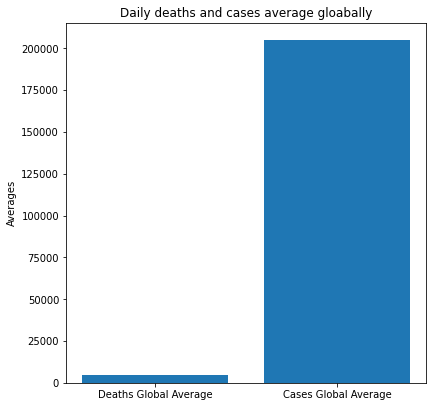

In [19]:
import matplotlib.pyplot as plt
#  تحديد البيانات:
x = ['Deaths Global Average','Cases Global Average']

y = [corona_gloabl_deaths_avg, corona_gloabl_cases_avg]

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1, .1, 1, 1])

ax.set_ylabel('Averages')

ax.set_title('Daily deaths and cases average gloabally')

ax.bar(x,y)

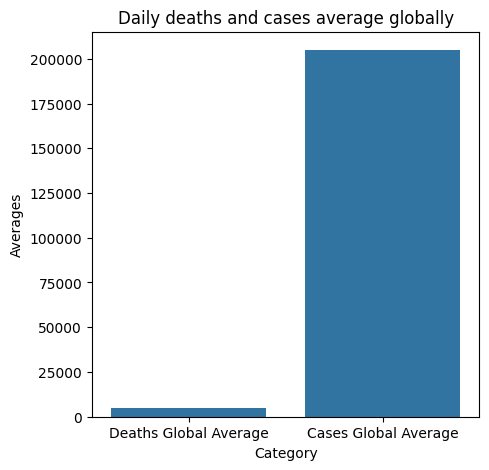

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# بيانات
x = ['Deaths Global Average', 'Cases Global Average']
y = [corona_gloabl_deaths_avg, corona_gloabl_cases_avg]

# تحويل البيانات إلى DataFrame
data = pd.DataFrame({
    'Category': x,
    'Average': y
})

# إعداد الشكل
plt.figure(figsize=(5,5))

# رسم مخطط countplot باستخدام sns
sns.barplot(x='Category', y='Average', data=data)

# إضافة عنوان وتسمية المحاور
plt.title('Daily deaths and cases average globally')
plt.ylabel('Averages')

# عرض المخطط
plt.show()


In [12]:
avg_by_country=corona.groupby('Countries')[['deaths', 'cases']].agg(["sum"]).sort_values(by=("deaths", "sum"), ascending=False)
avg_by_country

,deaths,cases
,sum,sum
Countries,,
United_States_of_America,299177,16256754
Brazil,181402,6901952
India,143355,9884100
Mexico,113953,1250044
Italy,64582,1844008
...,...,...
Saint_Vincent_and_the_Grenadines,0,98
Solomon_Islands,0,17


# متوسط الاصابات و الوفيات حسب كل دولة 

In [13]:
#avg_by_country = corona.groupby('Countries')[['deaths','cases']].agg([sum]).sort_values(by=('deaths','sum'),ascending=False)
avg_by_country=corona.groupby('Countries')[['deaths', 'cases']].agg(["sum"]).sort_values(by=("deaths", "sum"), ascending=False)

avg_by_country = avg_by_country / corona_days
avg_by_country

,deaths,cases
,sum,sum
Countries,,
United_States_of_America,857.240688,46580.957020
Brazil,519.776504,19776.366762
India,410.759312,28321.203438
Mexico,326.512894,3581.787966
Italy,185.048711,5283.690544
...,...,...
Saint_Vincent_and_the_Grenadines,0.000000,0.280802
Solomon_Islands,0.000000,0.048711


# رسمنا مخطط شريطي باستخدام باندا لانو عندي series plot(kind='bar')
# مافي داعي لاستخدام matplotlip

In [14]:
avg_by_country['deaths']['sum']

Countries
United_States_of_America            857.240688
Brazil                              519.776504
India                               410.759312
Mexico                              326.512894
Italy                               185.048711
                                       ...    
Saint_Vincent_and_the_Grenadines      0.000000
Solomon_Islands                       0.000000
Timor_Leste                           0.000000
Wallis_and_Futuna                     0.000000
Vanuatu                               0.000000
Name: sum, Length: 214, dtype: float64

<Axes: xlabel='Countries'>

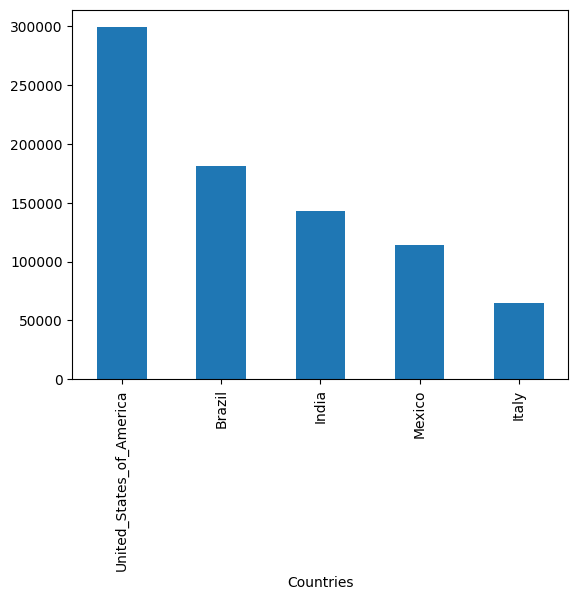

In [13]:
# أعلى 5 دول بالوفيات
avg_by_country['deaths']['sum'].head(5).plot(kind='bar')

<AxesSubplot:xlabel='Countries'>

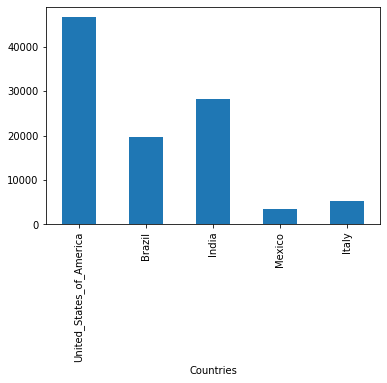

In [22]:
# أعلى 5 دول بالاصابات
avg_by_country['cases']['sum'].head(5).plot(kind='bar')

In [15]:
import matplotlib.pyplot as plt
# تحويل البيانات لتكون أعمدة عادية بدلاً من MultiIndex
df = avg_by_country.reset_index()
df

,Countries,deaths,cases
,,sum,sum
0,United_States_of_America,299177,16256754
1,Brazil,181402,6901952
2,India,143355,9884100
3,Mexico,113953,1250044
4,Italy,64582,1844008
...,...,...,...
209,Saint_Vincent_and_the_Grenadines,0,98
210,Solomon_Islands,0,17
211,Timor_Leste,0,31


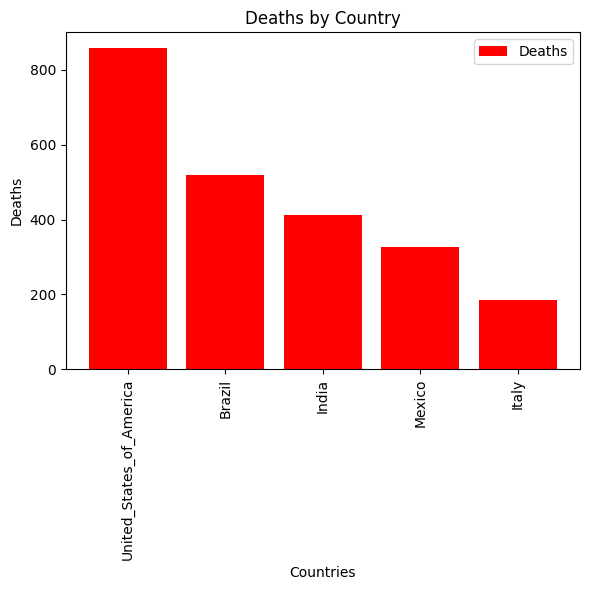

In [39]:
import matplotlib.pyplot as plt

df = avg_by_country.reset_index()
df=df.head(5)
# رسم مخطط شريطي للوفيات 'deaths'
plt.figure(figsize=(6, 6))
plt.bar(df['Countries'], df['deaths']['sum'], color='red', label='Deaths')
plt.xlabel('Countries')
plt.ylabel('Deaths')
plt.xticks(rotation=90)  # تدوير أسماء الدول لسهولة القراءة
plt.title('Deaths by Country')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
sum_by_month = corona[corona['year']==2020]
sum_by_month

,day,month,year,cases,deaths,Countries,Population
67,1,1,2020,0,0,Afghanistan,38.04
68,1,1,2020,0,0,Algeria,43.05
69,1,1,2020,0,0,Armenia,2.96
70,1,1,2020,0,0,Australia,25.20
71,1,1,2020,0,0,Austria,8.86
...,...,...,...,...,...,...,...
61895,14,12,2020,0,0,Wallis_and_Futuna,0.00
61896,14,12,2020,0,0,Western_Sahara,0.58
61897,14,12,2020,0,0,Yemen,29.16
61898,14,12,2020,57,1,Zambia,17.86


In [22]:
sum_by_month = corona[corona['year']==2020].groupby('month')[['deaths','cases']].agg(["sum"])
sum_by_month

,deaths,cases
,sum,sum
month,,
1,213,9799
2,2708,75422
3,35814,723756
4,189180,2341230
5,143978,2901710
6,134131,4251355
7,166203,7067744
8,179532,7966606


In [ ]:
# مجموع الاصابات و الوفيات الشهري خلال عام 2020 حسب كل شهر 

In [16]:
sum_by_month = corona[corona['year']==2020].groupby('month')[['deaths','cases']].agg(["sum"]).sort_values(by=('month'))
sum_by_month

,deaths,cases
,sum,sum
month,,
1,213,9799
2,2708,75422
3,35814,723756
4,189180,2341230
5,143978,2901710
6,134131,4251355
7,166203,7067744
8,179532,7966606


([<matplotlib.patches.Wedge at 0x14611164310>,
 [Text(1.0999999058878793, 0.0004550237981056115, '1'),
  Text(1.0999796256874734, 0.006695003543383832, '2'),
  Text(1.0964024684544509, 0.08889109723131475, '3'),
  Text(0.9557743788748829, 0.544513853530222, '4'),
  Text(0.434366110455543, 1.0106067890568138, '5'),
  Text(-0.14714236720101267, 1.0901142709709302, '6'),
  Text(-0.7231981904740354, 0.8288452070773414, '7'),
  Text(-1.0818467305516066, 0.19901671184802494, '8'),
  Text(-0.9748414911532415, -0.5095920595202841, '9'),
  Text(-0.4510883092734418, -1.003254373146127, '10'),
  Text(0.4839606016895887, -0.9878168534765195, '11'),
  Text(1.0526781517903785, -0.3191687778326587, '12')],
 [Text(0.599999948666116, 0.00024819479896669714, '0.0'),
  Text(0.5999888867386218, 0.0036518201145729987, '0.2'),
  Text(0.5980377100660641, 0.048486053035262586, '2.2'),
  Text(0.5213314793862998, 0.2970075564710301, '11.7'),
  Text(0.23692696933938706, 0.551240066758262, '8.9'),
  Text(-0.08025

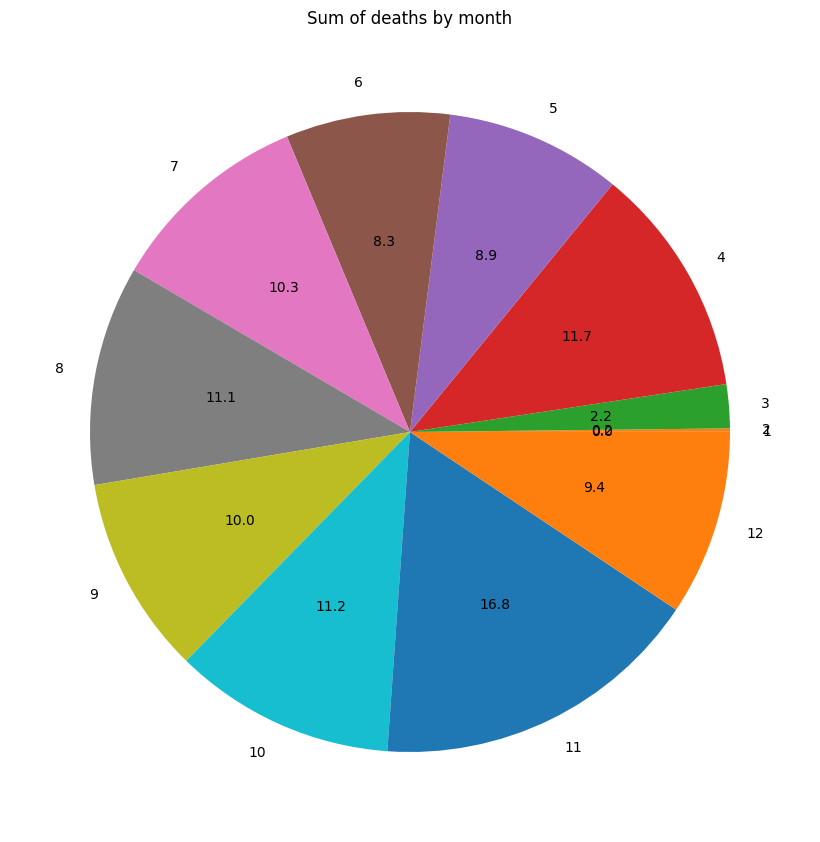

In [40]:
import matplotlib.pyplot as plt

x = sum_by_month.index.tolist()

y = sum_by_month['deaths']['sum']

fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([.1,.1,1,1])

ax.set_title('Sum of deaths by month')
ax.pie(y, labels = x , autopct = '%.1f')

([<matplotlib.patches.Wedge at 0x1461152fe20>,
 [Text(1.0999998981472152, 0.0004733667882973285, '1'),
  Text(1.0999904227959725, 0.0045901805125653766, '2'),
  Text(1.0991519510791397, 0.043185511909906424, '3'),
  Text(1.0834145835127067, 0.19029671629323566, '4'),
  Text(1.0113932309160563, 0.43253177045990626, '5'),
  Text(0.8282503980195541, 0.7238793257031522, '6'),
  Text(0.3828143487067153, 1.0312386602645645, '7'),
  Text(-0.3301112198533693, 1.0492981380555866, '8'),
  Text(-0.9411845265500454, 0.5693607704986068, '9'),
  Text(-1.0322492736429727, -0.3800808296449, '10'),
  Text(0.06510271819890244, -1.0980717809337943, '11'),
  Text(1.0217105995616769, -0.4075628181560715, '12')],
 [Text(0.5999999444439355, 0.00025820006634399734, '0.0'),
  Text(0.5999947760705304, 0.0025037348250356597, '0.1'),
  Text(0.5995374278613489, 0.023555733769039865, '1.0'),
  Text(0.5909534091887491, 0.10379820888721945, '3.3'),
  Text(0.5516690350451215, 0.23592642025085794, '4.1'),
  Text(0.4517

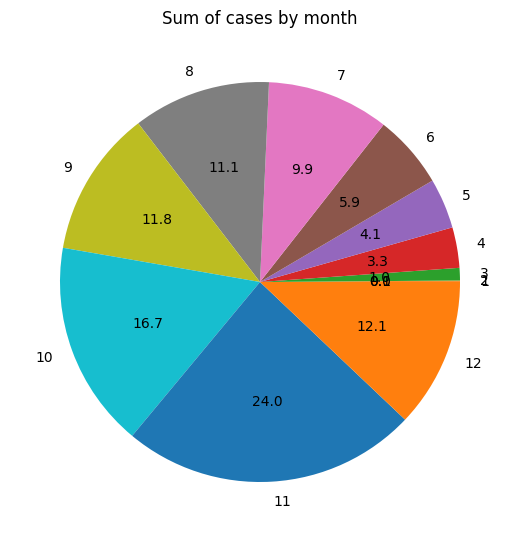

In [41]:
x = sum_by_month.index.tolist()

y = sum_by_month['cases']['sum']

fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])

ax.set_title('Sum of cases by month')
ax.pie(y, labels = x , autopct = '%.1f')

In [29]:
sum_by_month_country = corona.groupby(['Countries','month'])[['deaths','cases']].agg(["sum"])
sum_by_month_country

deaths  cases
                     sum    sum
Countries   month              
Afghanistan 1          0      0
            2          0      1
            3          4    140
            4         56   1808
            5        189  12576
...                  ...    ...
Zimbabwe    8        143   3320
            9         32   1425
            10        14    525
            11        34   1588
            12        31   1296

[2221 rows x 2 columns]

In [43]:
# مجموع الاصابات و الوفيات حسب كل شهر و حسب كل دولة 

In [27]:
sum_by_month_country = corona.groupby(['Countries','month'])[['deaths','cases']].agg(["sum"])
sum_by_month_country 

deaths  cases
                     sum    sum
Countries   month              
Afghanistan 1          0      0
            2          0      1
            3          4    140
            4         56   1808
            5        189  12576
...                  ...    ...
Zimbabwe    8        143   3320
            9         32   1425
            10        14    525
            11        34   1588
            12        31   1296

[2221 rows x 2 columns]

In [26]:
sum_by_month_country = corona.groupby(['Countries','month'])[['deaths','cases']].agg([sum]).sort_index()
sum_by_month_country

deaths  cases
                     sum    sum
Countries   month              
Afghanistan 1          0      0
            2          0      1
            3          4    140
            4         56   1808
            5        189  12576
...                  ...    ...
Zimbabwe    8        143   3320
            9         32   1425
            10        14    525
            11        34   1588
            12        31   1296

[2221 rows x 2 columns]

In [27]:
sum_by_month_country.loc[['China','Italy']]

deaths   cases
                   sum     sum
Countries month               
China     1        213    9687
          2       2624   69641
          3        472    2886
          4       1328    1703
          5          1     184
          6          3     652
          7         18    2709
          8         63    2406
          9         17     633
          10         0     771
          11         0     515
          12         0     234
Italy     1          0       3
          2         21     885
          3      11570  100851
          4      16091  101852
          5       5658   29073
          6       1466    8068
          7        388    6722
          8        345   21060
          9        398   44793
          10      2446  334663
          11     16583  937504
          12      9616  258534

In [45]:
corona_by_country = corona.groupby('Countries')

deaths_by_country_sum = corona_by_country['deaths'].sum()

deaths_by_country_sum = deaths_by_country_sum.sort_values(ascending=False).head(5)
deaths_by_country_sum

Countries
United_States_of_America    299177
Brazil                      181402
India                       143355
Mexico                      113953
Italy                        64582
Name: deaths, dtype: int64

<Axes: xlabel='Countries'>

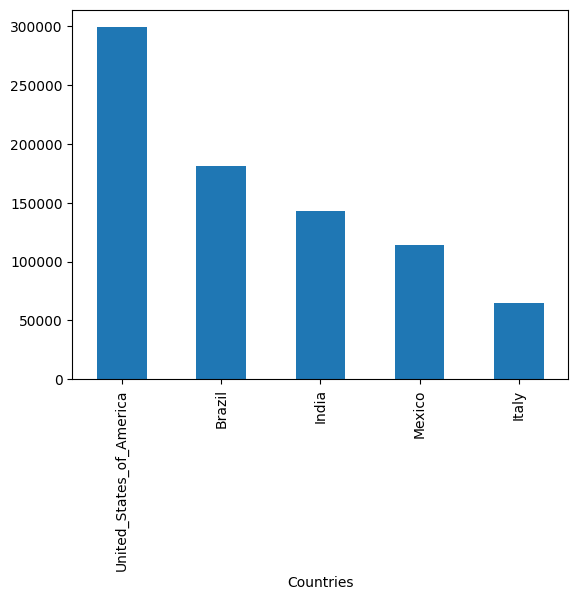

In [49]:
deaths_by_country_sum.plot(kind='bar')

<BarContainer object of 5 artists>

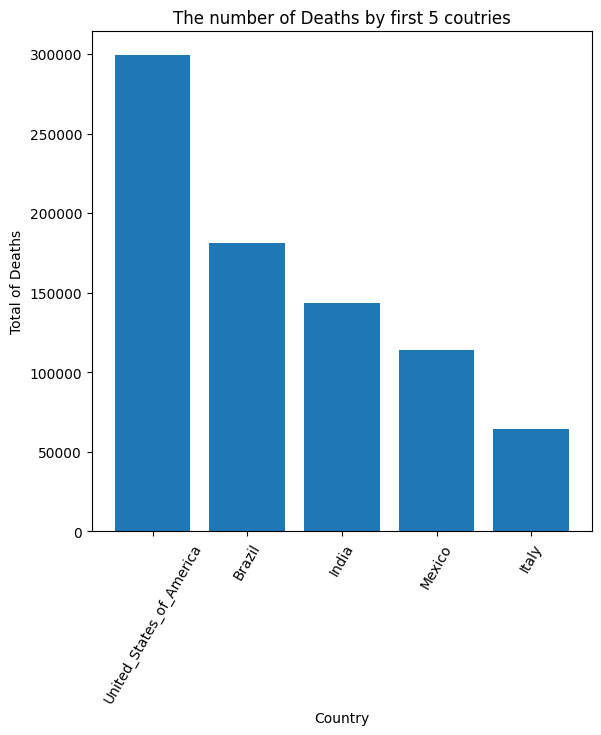

In [50]:
x = deaths_by_country_sum.index.tolist()

y = deaths_by_country_sum

# إعداد الشكل
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([.1,.1,1,1])
# تعيين العناوين
ax.set_xlabel('Country')
ax.set_ylabel('Total of Deaths')
ax.set_title('The number of Deaths by first 5 coutries')

# تعيين التحديدات على المحور الأفقي (X)
ax.set_xticks(range(len(x)))  # تحديد مواقع التحديدات بناءً على عدد العناصر في x

# تعيين التسميات مع تدوير النص
ax.set_xticklabels(x, rotation=60, horizontalalignment='center')

ax.bar(x,y)

In [25]:
corona_by_day_ser = corona[corona['Countries']=='Italy'].sort_values(by=['year','month','day']).reset_index(drop=True)
corona_by_day_ser

,day,month,year,cases,deaths,Countries,Population
0,31,12,2019,0,0,Italy,60.36
1,1,1,2020,0,0,Italy,60.36
2,2,1,2020,0,0,Italy,60.36
3,3,1,2020,0,0,Italy,60.36
4,4,1,2020,0,0,Italy,60.36
...,...,...,...,...,...,...,...
345,10,12,2020,12755,499,Italy,60.36
346,11,12,2020,16998,887,Italy,60.36
347,12,12,2020,18726,761,Italy,60.36
348,13,12,2020,19902,649,Italy,60.36


993
339


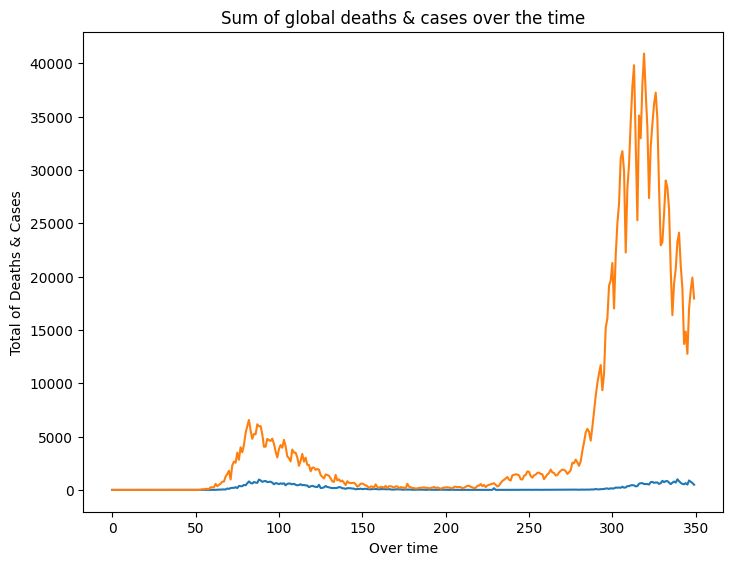

In [20]:
import matplotlib.pyplot as plt
x = corona_by_day_ser.index
y = corona_by_day_ser[['deaths','cases']]

max_deaths_v = y['deaths'].max()
max_deaths_i = corona_by_day_ser['deaths'].idxmax()
print(max_deaths_v)
print(max_deaths_i)
 
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
ax.set_xlabel('Over time')
ax.set_ylabel('Total of Deaths & Cases')
ax.set_title('Sum of global deaths & cases over the time')
#ax.set_xticklabels(' ')

#ax.annotate('Max Deaths \n {} deaths'.format(max_deaths_v), xy=(max_deaths_i, max_deaths_v), xytext=( int(max_deaths_i)+5  ,int(max_deaths_v) + 50),
              # arrowprops=dict(facecolor='red'))
ax.plot(x,y)

In [31]:
def time_series_by_country(country):
    
    corona_by_day_ser = corona[corona['Countries']==country].sort_values(by=['year','month','day']).reset_index(drop=True)

    x = corona_by_day_ser.index
    y = corona_by_day_ser[['deaths','cases']]
    
    max_deaths_v = y['deaths'].max()
    #max_deaths_v = corona_by_day_ser['deaths'].max()
    max_deaths_i = corona_by_day_ser['deaths'].idxmax()
    
    max_cases_v =  y['cases'].max()
    max_cases_i = corona_by_day_ser['cases'].idxmax()
    
    fig = plt.figure()
    ax = fig.add_axes([.1,.1,1,1])

    ax.set_xlabel('Over time')
    ax.set_ylabel('Total of Deaths & Cases')
    ax.set_title('Sum of global deaths & cases over the time')
    #ax.set_xticklabels(' ')

    #ax.annotate('Max Deaths \n {} deaths'.format(max_deaths_v), xy=(max_deaths_i, max_deaths_v), xytext=( int(max_deaths_i)+5  ,int(max_deaths_v)+ 50 ),
               #arrowprops=dict(facecolor='red'))

    #ax.annotate('Max Cases \n {} cases'.format(max_cases_v) , xy=(max_cases_i, max_cases_v), xytext=( int(max_cases_i)+5  ,int(max_cases_v) + 50),
               #arrowprops=dict(facecolor='red'))

    ax.annotate(f'Max Deaths \n {max_deaths_v} deaths', 
            xy=(max_deaths_i, max_deaths_v), 
            xytext=(int(max_deaths_i) + 5, int(max_deaths_v) + 50),
            arrowprops=dict(facecolor='red'))

    ax.annotate(f'Max Cases \n {max_cases_v} cases', 
            xy=(max_cases_i, max_cases_v), 
            xytext=(int(max_cases_i) + 5, int(max_cases_v) + 50),
            arrowprops=dict(facecolor='red'))
    ax.plot(x,y)

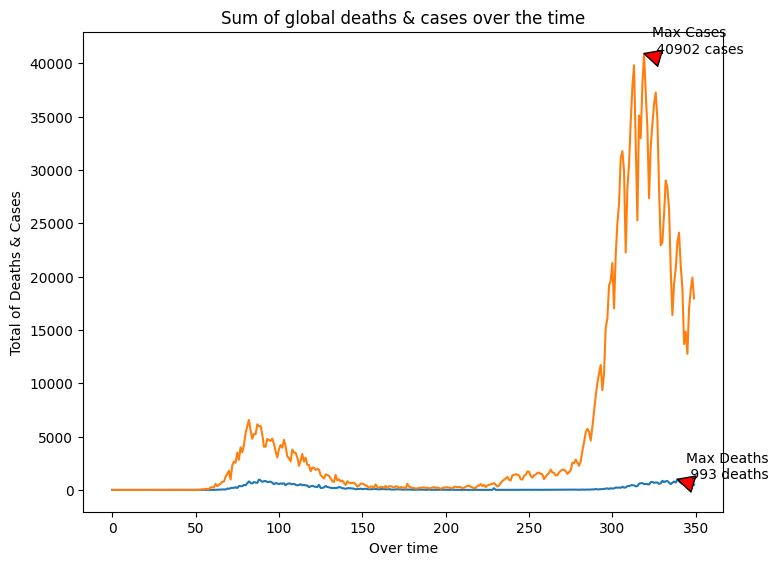

In [32]:
time_series_by_country('Italy')

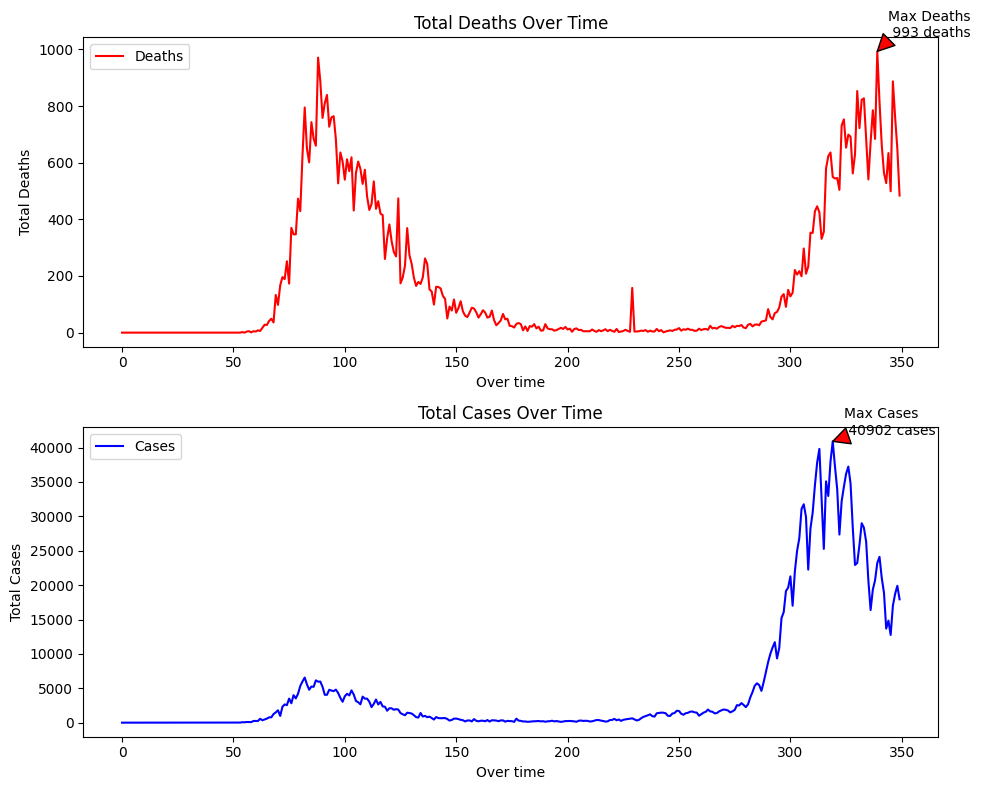

In [32]:
import matplotlib.pyplot as plt

# استخراج البيانات
x = corona_by_day_ser.index
y = corona_by_day_ser[['deaths', 'cases']]

max_deaths_v = y['deaths'].max()
max_deaths_i = corona_by_day_ser['deaths'].idxmax()

max_cases_v =  y['cases'].max()
max_cases_i = corona_by_day_ser['cases'].idxmax()

# إنشاء الشكل (figure) بمخططين فرعيين
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))  # 2 صفوف، 1 عمود

# رسم المخطط الأول للوفيات
axes[0].plot(x, y['deaths'], color='red', label='Deaths')
axes[0].set_title('Total Deaths Over Time')
axes[0].set_xlabel('Over time')
axes[0].set_ylabel('Total Deaths')
axes[0].legend()
axes[0].annotate(f'Max Deaths \n {max_deaths_v} deaths', 
            xy=(max_deaths_i, max_deaths_v), 
            xytext=(int(max_deaths_i) + 5, int(max_deaths_v) + 50),
            arrowprops=dict(facecolor='red'))

# رسم المخطط الثاني للإصابات
axes[1].plot(x, y['cases'], color='blue', label='Cases')
axes[1].set_title('Total Cases Over Time')
axes[1].set_xlabel('Over time')
axes[1].set_ylabel('Total Cases')
axes[1].legend()
axes[1].annotate(f'Max Cases \n {max_cases_v} cases', 
            xy=(max_cases_i, max_cases_v), 
            xytext=(int(max_cases_i) + 5, int(max_cases_v) + 1000),
            arrowprops=dict(facecolor='red'))

# ضبط تخطيط الشكل لمنع التداخل
plt.tight_layout()

# عرض الرسم البياني
plt.show()